The first step in simulating ellipsometric spectra is learning how to generate dielectic functions for materials. In this workbook, the Cody-Lorentz (CL) and Tauc-Lorentz (TL) oscillators will be established. The a set of dielectic spectra from CompleteEASE will be used as a comparison point to validate the following program. 

The math used to generate these dielectic functions can be found in: 

Ferlauto, A. S., et al. "Analytical model for the optical functions of amorphous semiconductors from the near-infrared to ultraviolet: Applications in thin film photovoltaics." Journal of Applied Physics 92.5 (2002): 2424-2436.

The first step is to run the program called "functions". This program will import all the libraries used in this work. The functions program will also store any user-defined functions created during this project. Most of the user defined functions will highlighted in these notebooks.


In [2]:
# Run functions 
%run Functions.ipynb

In [22]:
# Next, load in reference file from CompleteEASE

# input location of files
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Optical Properties" in the XXXX space ####################

# Name of reference CL file. Filename contains the parameter values 
file = r"CL_Einf_1.25_A1_80_Br1_2.5_Eo1_3.8_Eg1_1.6_Ep1_1.2.csv"
# read file. Sotre as CL
CL = pd.read_csv(file)

# Name of reference TL file. Filename contains the parameter values 
file = r"TL_Einf_1.25_A1_200_Br1_2.5_Eo1_3.8_Eg1_1.6.csv"
# read file. Store as TL
TL = pd.read_csv(file)

# From file names, parameters can be initalized. 

# CL parameters
CL_Einf = 1.25
CL_Amp = 80 
CL_Br = 2.5
CL_Eo = 3.8
CL_Eg = 1.6
CL_Ep = 1.2

# TL parameters
TL_Einf = 1.25
TL_Amp = 200 
TL_Br = 2.5 
TL_Eo = 3.8
TL_Eg = 1.6 


# Take spectral range in terms of photon energy and wavelength for future calculations
E = CL['Energy (eV)'] # store photon energy 
wv = CL['Wavelength (nm)'] # store wavelength


In [24]:
# View CL data as a sanity check
print(CL)

     Wavelength (nm)  Energy (eV)         e1        e2         n         k
0         211.341217     5.867289  -5.917663  6.724091  1.232797  2.727169
1         212.932571     5.823440  -5.989316  6.927778  1.258674  2.752013
2         214.523956     5.780241  -6.058547  7.136192  1.285031  2.776662
3         216.115387     5.737676  -6.125176  7.349375  1.311871  2.801104
4         217.706833     5.695733  -6.189014  7.567357  1.339200  2.825327
..               ...          ...        ...       ...       ...       ...
692      1673.974976     0.740752  12.174698  0.000000  3.489226  0.000000
693      1677.398071     0.739240  12.172729  0.000000  3.488944  0.000000
694      1680.820557     0.737735  12.170774  0.000000  3.488664  0.000000
695      1684.242432     0.736236  12.168832  0.000000  3.488385  0.000000
696      1687.663696     0.734744  12.166903  0.000000  3.488109  0.000000

[697 rows x 6 columns]


In [26]:
# View TL data as a sanity check
print(TL)

     Wavelength (nm)  Energy (eV)         e1         e2         n         k
0         211.341217     5.867289  -6.195093   9.595239  1.616521  2.967867
1         212.932571     5.823440  -6.231529   9.845193  1.646219  2.990245
2         214.523956     5.780241  -6.264057  10.099678  1.676375  3.012356
3         216.115387     5.737676  -6.292472  10.358689  1.706995  3.034189
4         217.706833     5.695733  -6.316567  10.622209  1.738080  3.055731
..               ...          ...        ...        ...       ...       ...
692      1673.974976     0.740752  13.790840   0.000000  3.713602  0.000000
693      1677.398071     0.739240  13.788785   0.000000  3.713325  0.000000
694      1680.820557     0.737735  13.786743   0.000000  3.713050  0.000000
695      1684.242432     0.736236  13.784716   0.000000  3.712777  0.000000
696      1687.663696     0.734744  13.782701   0.000000  3.712506  0.000000

[697 rows x 6 columns]


Now begin defining terms according to Ferlauto et al. The terms are covered in equations 1 - 31 in that work.

In [29]:
def L(E, Amp, Br, Eo ): # From equation 1b
    
    L = (Amp * Br * Eo * E) / ( (E**2 - Eo**2)**2 + ( Br**2 * E**2 ) ) 
    
    return (L)  

def Z(Eo, Br): # From equation 9
    
    Z = ( Eo**2 - ((Br**2)/2)  )**(1/2) 
    return(Z)

def X(Eo, Br):  # From equation 10
    
    X = ( 4*Eo**2 - Br**2 )**(1/2)
    return(X)

def Gt(E, Eg): # From equation 4
    
    Gt = (E - Eg)**2 / (E**2)
    return(Gt)

def Ld(E, Eo, Br):  # From equation 17
    
    Ld = (E**2 - Eo**2)**2 + ((Br**2)*(E**2))
    return(Ld)

def Cot(E, Eg, Eo, Br): # From equation 11
    
    gt = Gt(E, Eg)
    ld = Ld(E, Eo, Br)
    Cot = (E * gt)/(2 * ld)
    
    return(Cot)

def Dot(E, Eg, Eo, Br): # From equation 12
    
    ld = Ld(E, Eo, Br)
    Dot = -(E + Eg)**2 / (2*E*ld)
    return(Dot)

def A3t(E, Eg, Eo, Br):# From equation 13
    
    cot = Cot(E, Eg, Eo, Br)
    dot = Dot(E, Eg, Eo, Br)
    a3t = -(cot + dot)
    return(a3t)

def A2t(E, Eg, Eo, Br): # From equation 14
    
    cot = Cot(E, Eg, Eo, Br)
    dot = Dot(E, Eg, Eo, Br)
    a2t = -E*(cot - dot)
    return(a2t)

def A1t(E, Eg, Eo, Br): # From equation 15
    
    cot = Cot(E, Eg, Eo, Br)
    dot = Dot(E, Eg, Eo, Br)
    z = Z(Eo, Br)
    a1t = -(E**2 - 2*(z**2))*(cot + dot)
    return(a1t)

def Aot(E, Eg, Eo, Br): # From equation 16
    
    cot = Cot(E, Eg, Eo, Br)
    dot = Dot(E, Eg, Eo, Br)
    z = Z(Eo, Br)
    aot = 1 - (  E*( E**2 - 2*(z**2) )*(cot - dot) )
    return(aot)


def I1t(Eo, Br, Et): # From equation 6

    z = Z(Eo, Br)
    x = X(Eo, Br)
    
    I1t = (1/(2*x*Br)) * (math.pi - 2*math.atan( 2*((Et**2 - z**2)/(x*Br)) )  ) 
    
    return(I1t)


def Ioat(Eo, Br, Et): # From equation 7
    
    x = X(Eo, Br)   
    Ioat = (1/(2*Br)) * ( math.pi - math.atan(((2*Et + x)/Br))  + math.atan(((-2*Et + x)/Br))  )
    return(Ioat)
    
def Iobt(Eo, Br, Et): # From equation 8
    
    x = X(Eo, Br)
    Iobt = (1/(4*x)) * math.log( (Et**2 + Eo**2 + x*Et) / (Et**2 + Eo**2 - x*Et)   )
    return(Iobt)
    
    
def ITL(E, Eg, Eo, Br, A, Et):# From equations 5-8

    
    aot = Aot(E, Eg, Eo, Br)
    a1t = A1t(E, Eg, Eo, Br)
    a2t = A2t(E, Eg, Eo, Br)
    a3t = A3t(E, Eg, Eo, Br)
    cot = Cot(E, Eg, Eo, Br)
    dot = Dot(E, Eg, Eo, Br)
    z = Z(Eo, Br)
    ld = Ld(Et, Eo, Br)
    i1t = I1t(Eo, Br, Et)
    ioat = Ioat(Eo, Br, Et)
    iobt = Iobt(Eo, Br, Et)
    
    ITL_Coeff = (2*A*Eo*Br)/math.pi
    ITL_t1 = a3t * ((z**2)*i1t - math.log((ld)**(1/4)))
    ITL_t2 = a2t * (ioat + iobt)
    ITL_t3 = a1t*i1t
    ITL_t4 = aot*( (ioat - iobt) / (Eo**2))
     
    try:
        ITL_t5 = cot * math.log(abs(E - Et))
    
    except ValueError:
        
        ITL_t5 = 0
        
    
    
    ITL_t6 = dot*math.log(E + Et)
    
    ITL = ITL_Coeff * (ITL_t1 + ITL_t2 + ITL_t3 + ITL_t4 - ITL_t5 - ITL_t6)
    
    return(ITL)
    
    



def Fsq(Ep, Eg): # From equations 29
    
    Fsq = Ep**2 + Eg**2
    return(Fsq)


def Ksq(Ep, Eg, Eo, Br): # From equations 30
    
    z = Z(Eo, Br)
    fsq = Fsq(Ep, Eg)
    
    Ksq = 2*fsq + 2*(z**2) - 4*Eg**2
    return(Ksq)

def Ycube(Ep, Eg, Eo, Br):# From equations 31
    
    fsq = Fsq(Ep, Eg)
    ksq = Ksq(Ep, Eg, Eo, Br)
    Ycube = Eo**4 + fsq*(ksq - fsq) - 4*(Eg**2)*ksq
    return(Ycube)

def Gc(E, Eg, Ep):# From equations 18
    
    Gc = (E-Eg)**2 / ( (E-Eg)**2 + Ep**2   )
    return(Gc)


def Ioc(Ep, Eg, Et): # From equations 20
    
    Ioc = (1 / Ep) * ( (math.pi/2) - math.atan( (Et - Eg)/Ep) )
    return(Ioc)

def Coc(E, Eg, Ep, Eo, Br): # From equations 21
    
    gc = Gc(E, Eg, Ep)
    ld = Ld(E, Eo, Br)
    coc = (E*gc) / (2*ld)
    return(coc)

def Doc(E, Eg, Ep, Eo, Br): # From equations 22
    
    ld = Ld(E, Eo, Br)
    doc =  -  (E*(E+Eg)**2) / ( (2*ld)*((E+Eg)**2 + Ep**2) )
    return(doc)

def Boc(E, Ep, Eg, Eo, Br): # From equations 23
    
    ycube = Ycube(Ep, Eg, Eo, Br)
    fsq = Fsq(Ep, Eg)
    ksq = Ksq(Ep, Eg, Eo, Br)
    ld = Ld(E, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    
    boc_numerator = (ycube*fsq) * (   (ld*( (1/E)*(coc - doc) + 2*Eg*ksq*(1/ycube)*(coc + doc) )) - (1)  )
    
    boc_denominator = (ksq - fsq)*fsq*ycube + (Eo**4)*ycube + 4*(Eg**2)*fsq*(ksq**2)
    
    boc = boc_numerator / boc_denominator
    
    return(boc)

def B1c(E, Ep, Eg, Eo, Br): # From equations 24
    
    boc = Boc(E, Ep, Eg, Eo, Br)
    ksq = Ksq(Ep, Eg, Eo, Br)
    ycube = Ycube(Ep, Eg, Eo, Br)
    ld = Ld(E, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    
    b1c = (1/ycube) * ( (2*Eg*ksq*boc) - (ld*(coc + doc))  )
    return(b1c)

def A3c(E, Ep, Eg, Eo, Br): # From equations 25
    
    b1c = B1c(E, Ep, Eg, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    
    a3c = -(b1c + coc + doc)
    return(a3c)

def A2c(E, Ep, Eg, Eo, Br): # From equations 26
    
    boc = Boc(E, Ep, Eg, Eo, Br)
    b1c = B1c(E, Ep, Eg, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    
    a2c = - ( boc + 2*Eg*b1c + E*(coc - doc) )
    return(a2c)

def A1c(E, Ep, Eg, Eo, Br): # From equations 27
    
    boc = Boc(E, Ep, Eg, Eo, Br)
    ksq = Ksq(Ep, Eg, Eo, Br)
    fsq = Fsq(Ep, Eg)
    b1c = B1c(E, Ep, Eg, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    z = Z(Eo, Br)
    
    a1c = - ( 2*Eg*boc - (ksq - fsq)*b1c + (E**2 - 2*(z**2))*(coc + doc) )
    return(a1c)

def Aoc(E, Ep, Eg, Eo, Br): # From equations 28
    
    ksq = Ksq(Ep, Eg, Eo, Br)
    fsq = Fsq(Ep, Eg) 
    boc = Boc(E, Ep, Eg, Eo, Br)
    b1c = B1c(E, Ep, Eg, Eo, Br)
    coc = Coc(E, Eg, Ep, Eo, Br)
    doc = Doc(E, Eg, Ep, Eo, Br)
    z = Z(Eo, Br)
    
    aoc = 1 + (ksq - fsq)*boc + 2*Eg*ksq*b1c - E*((E**2) - 2*(z**2))*(coc - doc)
    return(aoc)



def ITL_C(E, Ep, Eg, Eo, Br, A, Et): # From equations 19
    
    aot = Aoc(E, Ep, Eg, Eo, Br)
    a1t = A1c(E, Ep, Eg, Eo, Br)
    a2t = A2c(E, Ep, Eg, Eo, Br)
    a3t = A3c(E, Ep, Eg, Eo, Br)
    cot = Coc(E, Eg, Ep, Eo, Br)
    dot = Doc(E, Eg, Ep, Eo, Br)
    z = Z(Eo, Br)
    ld = Ld(Et, Eo, Br)
    i1t = I1t(Eo, Br, Et)
    ioat = Ioat(Eo, Br, Et)
    iobt = Iobt(Eo, Br, Et)
    
    ITL_Coeff = (2*A*Eo*Br)/math.pi
    ITL_t1 = (a3t*((z**2)*i1t - math.log((ld)**(1/4))))
    ITL_t2 = (a2t*(ioat + iobt))
    ITL_t3 = a1t*i1t
    ITL_t4 = aot*( (ioat - iobt) / (Eo**2))
    
    try:
        ITL_t5 = cot * math.log(abs(E - Et))
    
    except ValueError:
        
        ITL_t5 = 0
    
    
    ITL_t6 = dot*math.log(E + Et)
    
    ITL = ITL_Coeff * (ITL_t1 + ITL_t2 + ITL_t3 + ITL_t4 - ITL_t5 - ITL_t6)
    
    return(ITL)


def ICL(E, Ep, Eg, Eo, Br, A, Et): # From equations 19-22
    
    iTL = ITL_C(E, Ep, Eg, Eo, Br, A, Et)
    ioc = Ioc(Ep, Eg, Et)
    boc = Boc(E, Ep, Eg, Eo, Br)
    b1c = B1c(E, Ep, Eg, Eo, Br)
    
    ICL = iTL + (2*A*Eo*Br)/math.pi * (  b1c*( Eg*ioc - math.log( ((Et-Eg)**2 + Ep**2)**(1/2) ) ) + (boc*ioc) )
    
    return(ICL)
    

With all of these terms defined, a function that make a TL or CL material can be defined

In [32]:
def Get_TL_Material(E, Eg, Eo, Br, Amp, Egt, E_inf, wv):

    # generates a Tauc-Lorentz dielectic function based on the provided spectra (E, wv) and parameters (Eg, Eo, Br, Amp, Egt, E_inf)

    
    e2 = [] # values for the imaginary part of dielectic function 
    e1 = [] # values for the real part of dielectic function
    e = [] # values for the complete dielectric function
    n = [] # refractive index 
    k = [] # extinction coefficient
    N = [] # complex refractive index



    # Iterate over the entire spectral range 
    for i in range(len(E)):

        #Calculate e2
    #***************************************************
        #calculate e2 if E <= Egt
        if E[i] <= Egt:
            #calculate e2 
            e2_temp = 0 # term is 0 in this range when neglective the Urbach Energy

            #store e2
            e2.append(e2_temp) 

        # calculate e2 if E > Egt   
        else:      
            #calculate e2   
            g = Gt(E[i], Eg) # calculates G        
            l = L(E[i], Amp, Br, Eo) # calculates L        
            e2_temp = g * l # e2 = G * L when E > Egt        
            # store e2
            e2.append(e2_temp) 



         #Calculate e1
    #***************************************************
        ITL_temp = ITL(E[i], Eg, Eo, Br, Amp, Egt) #TL analytic solution to KK-integration

        e1_temp = E_inf + ITL_temp # add E_infinity

        e1.append(e1_temp) # store result

         #Calculate e
    #***************************************************
        e.append( complex(e1_temp, e2_temp) )

         #Calculate n
    #***************************************************
        n.append( cmath.sqrt(0.5 * (e1_temp + cmath.sqrt(e1_temp**2 + e2_temp**2 ))).real )

         #Calculate k
    #***************************************************    
        k.append(cmath.sqrt(0.5 * (- e1_temp + cmath.sqrt(e1_temp**2 + e2_temp**2  ))).real)

             #Calculate N
    #***************************************************    
        N.append( complex(n[i], k[i]) )

    # save values
    dict = {'Wavelength (nm)':wv , 'Energy (eV)': E, 'e1': e1, 'e2':e2, 'e':e, 'n':n, 'k':k, 'N': N}

    df = pd.DataFrame(dict)
    df.name = "Eg_" + str(Eg) + "_Eo_" + str(Eo) + "_Br_" + str(Br) + "_Amp_" + str(Amp) + "_Et_" + str(Egt) + "_Einf_" + str(E_inf) 

    #return values
    return(df)

    

In [34]:
# Now its time to turn the simulated Cody-Lorentz oscillator into a material dataframe:

def Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv):

    # generates a Cody-Lorentz dielectic function based on the provided spectra (E, wv) and parameters (Ep, Eg, Eo, Br, Amp, Egt, E_inf)
    
    e2 = [] # values for the imaginary part of dielectic function 
    e1 = [] # values for the real part of dielectic function
    e = [] # values for the complete dielectric function
    n = [] # refractive index 
    k = [] # extinction coefficient
    N = [] # complex refractive index


    # Iterate over the entire spectral range 
    for i in range(len(E)):

        #Calculate e2
    #***************************************************
        #calculate e2 if E <= Egt
        if E[i] <= Egt:
            #calculate e2 
            e2_temp = 0 # term is 0 in this range when neglective the Urbach Energy

            #store e2
            e2.append(e2_temp) 

        # calculate e2 if E > Egt   
        else:      
            #calculate e2   
            g = Gc(E[i], Eg, Ep) # calculates G        
            l = L(E[i], Amp, Br, Eo) # calculates L        
            e2_temp = g * l # e2 = G * L when E > Egt        
            # store e2
            e2.append(e2_temp) 

         #Calculate e1
    #***************************************************
        ICL_temp = ICL(E[i], Ep, Eg, Eo, Br, Amp, Egt) #Cody-Loretnz analytic solution to KK-integration

        e1_temp = E_inf + ICL_temp # add E_infinity

        e1.append(e1_temp) # store result

         #Calculate e
    #***************************************************
        e.append( complex(e1_temp, e2_temp) )

         #Calculate n
    #***************************************************
        n.append( cmath.sqrt(0.5 * (e1_temp + cmath.sqrt(e1_temp**2 + e2_temp**2 ))).real )

         #Calculate k
    #***************************************************    
        k.append(cmath.sqrt(0.5 * (- e1_temp + cmath.sqrt(e1_temp**2 + e2_temp**2  ))).real)

             #Calculate N
    #***************************************************    
        N.append( complex(n[i], k[i]) )

    #Now its time to store results into a pandas data frame
    
    
    # Store data 
    dict = {'Wavelength (nm)':wv , 'Energy (eV)': E, 'e1': e1, 'e2':e2, 'e':e, 'n':n, 'k':k, 'N': N}

    df = pd.DataFrame(dict)
    df.name = "Ep_" + str(Ep) + "_Eg_" + str(Eg) + "_Eo_" + str(Eo) + "_Br_" + str(Br) + "_Amp_" + str(Amp) + "_Et_" + str(Egt) + "_Einf_" + str(E_inf) 

    # return data
    return(df)

Now a comparison between these functions can be made with the examples from CompleteEASE

In [37]:
#First generate the TL data 
# Use the parameters defined previously (repeated below for convenience). In this case the Egt parameter is the same as Eg

TL_Einf = 1.25
TL_Amp = 200 
TL_Br = 2.5 
TL_Eo = 3.8
TL_Eg = 1.6 


TL_Calculated = Get_TL_Material(E, TL_Eg, TL_Eo, TL_Br, TL_Amp, TL_Eg, TL_Einf, wv)

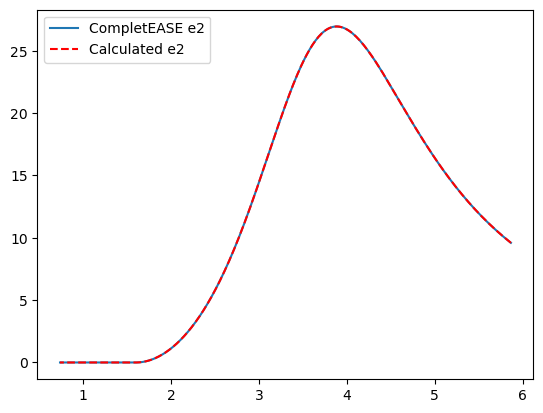

In [51]:
# Plot the e2 spectra for comparison
plt.plot(E, TL['e2'], label='CompletEASE e2' ) # plot e2 from CompleteEASE 
plt.plot(E, TL_Calculated['e2'], label = 'Calculated e2', color = 'red', linestyle='--') # plot e2 defined function
plt.legend() # legend

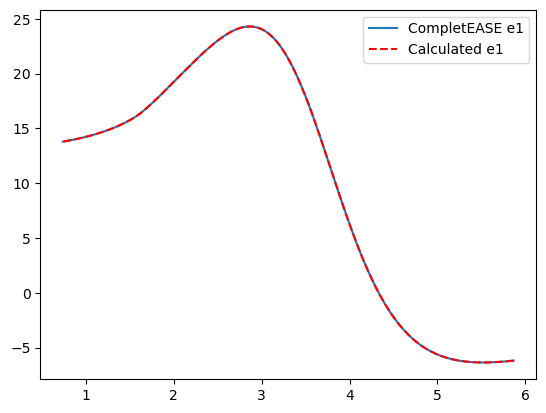

In [53]:
# Plot the e1 spectra for comparison
plt.plot(E, TL['e1'], label='CompletEASE e1' ) # plot e1 from CompleteEASE 
plt.plot(E, TL_Calculated['e1'], label = 'Calculated e1', color = 'red', linestyle='--') # plot e1 defined function
plt.legend() # legend

In [55]:
#Now generate the CL data 
# Use the parameters defined previously (repeated below for convenience). In this case the Egt parameter is the same as Eg

CL_Einf = 1.25
CL_Amp = 80 
CL_Br = 2.5
CL_Eo = 3.8
CL_Eg = 1.6
CL_Ep = 1.2


CL_Calculated = Get_CL_Material(E, CL_Ep, CL_Eg, CL_Eo, CL_Br, CL_Amp, CL_Eg, CL_Einf, wv)

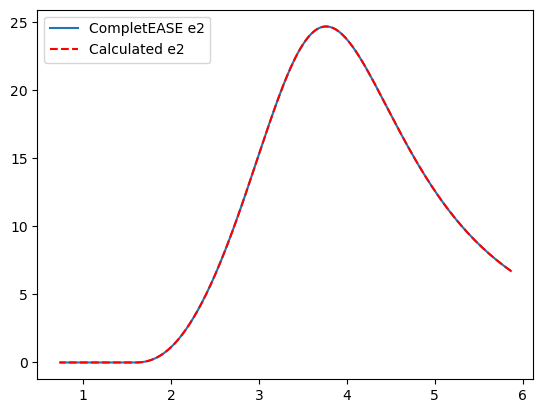

In [57]:
# Plot the e2 spectra for comparison
plt.plot(E, CL['e2'], label='CompletEASE e2' ) # plot e2 from CompleteEASE 
plt.plot(E, CL_Calculated['e2'], label = 'Calculated e2', color = 'red', linestyle='--') # plot e2 defined function
plt.legend() # legend

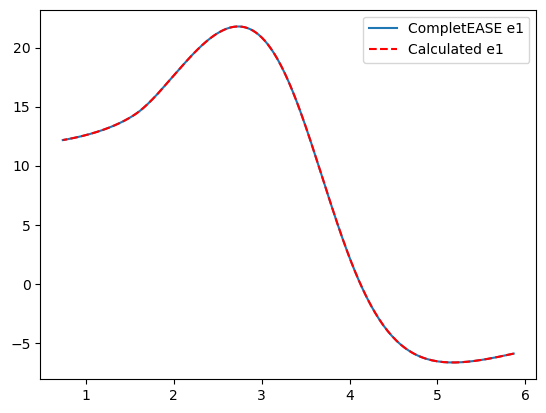

In [59]:
# Plot the e1 spectra for comparison
plt.plot(E, CL['e1'], label='CompletEASE e1' ) # plot e1 from CompleteEASE 
plt.plot(E, CL_Calculated['e1'], label = 'Calculated e1', color = 'red', linestyle='--') # plot e1 defined function
plt.legend() # legend

A function that can generate Tauc-Loretnz and Cody-Lorentz materials has been created! Now that these functions are working. A function to generate a Bruggeman effective medium approximation (EMA) needs to be developed in order to simulate surface layers.

In [62]:
# load in a reference EMA material from CompleteEASE to replicate. 
file = r"CL_Einf_1.25_A1_80_Br1_2.5_Eo1_3.8_Eg1_1.6_Ep1_1.2_EMA_25%_Void.csv"
EMA = pd.read_csv(file)

# Load in optical properties of void. 
file = r"Void.csv"
Void = pd.read_csv(file)
Void.name = 'Void'

In [66]:
#Now generate EMA function

def Bruggeman_EMA(Material1, Material2, Material2_Fraction):
    
    """
    Material1 and Material2 are both pandas dataframs with columns labeled ['e'] which corrispond to the complex dielectic material of the materials
    
    Material2_fraction is a number in the range of [0:1]
    """

    
    B = ( -1 * Material1['e'] * Material2_Fraction + 2 * Material2['e'] * Material2_Fraction - Material2['e'] * (1 - Material2_Fraction ) + 2 * Material1['e'] * (1 - Material2_Fraction ))
    
    eff =[] # dielectric of the effective material
    e1 =[] #  real part of the dielectic function
    e2 =[] #  imaginary part of the dielectic function
    n = [] # refractive index 
    k = [] # extinction coefficient
    N = [] # complex refractive index
    
    for i in range(len(B)): # iterate over spectral range


        t = (-B[i] + cmath.sqrt(B[i] * B[i] - 4 * (-2) *  Material1['e'][i] *  Material2['e'][i]) ) / -4

        if (t.imag > 0 ):
            eff.append(t)
            e1.append(t.real)
            e2.append(t.imag)
            nt = cmath.sqrt(0.5 * (t.real + cmath.sqrt(t.real*t.real + t.imag * t.imag ))).real
            kt = cmath.sqrt(0.5 * (- t.real + cmath.sqrt(t.real*t.real + t.imag * t.imag ))).real
            n.append(nt)
            k.append(kt)
            N.append(complex(nt, kt))

        else:

            t = (-B[i] - cmath.sqrt(B[i] * B[i] - 4 * (-2) *  Material1['e'][i] *  Material2['e'][i]) ) / -4

            eff.append(t)
            e1.append(t.real)
            e2.append(t.imag)
            nt = cmath.sqrt(0.5 * (t.real + cmath.sqrt(t.real*t.real + t.imag * t.imag ))).real
            kt = cmath.sqrt(0.5 * (- t.real + cmath.sqrt(t.real*t.real + t.imag * t.imag ))).real
            n.append(nt)
            k.append(kt)
            N.append(complex(nt, kt))




    dict =  {'Wavelength (nm)': wv, 'e1': e1, 'e2': e2, 'n': n, 'k' : k, 'N' : N} 
    df = pd.DataFrame(dict)
    
    df.name =  Material1.name + "_" + str(round(1 - Material2_Fraction, 2)) + "_"+ Material2.name + "_" + str(Material2_Fraction)
    
    
    return(df)
    


In [68]:
EMA_test = Bruggeman_EMA( CL_Calculated, Void, 0.25)

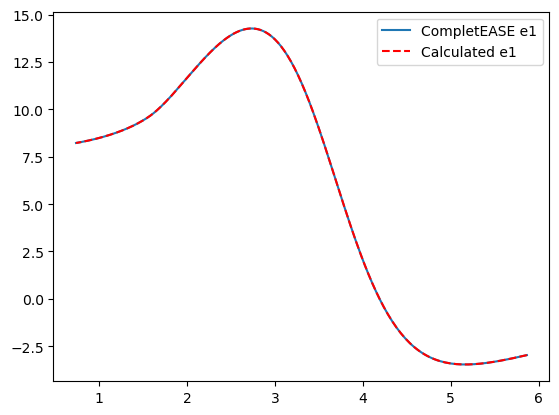

In [70]:
# Now to plot the CompleteEASE EMA with the new generated EMA_test
# Plot the e1 spectra for comparison
plt.plot(E, EMA['e1'], label='CompletEASE e1' ) # plot e1 from CompleteEASE 
plt.plot(E, EMA_test['e1'], label = 'Calculated e1', color = 'red', linestyle='--') # plot e1 defined function
plt.legend() # legend

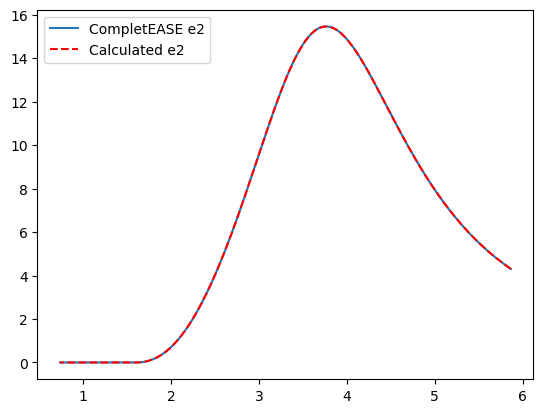

In [72]:
# Now to plot the CompleteEASE EMA with the new generated EMA_test
# Plot the e2 spectra for comparison
plt.plot(E, EMA['e2'], label='CompletEASE e2' ) # plot e2 from CompleteEASE 
plt.plot(E, EMA_test['e2'], label = 'Calculated e2', color = 'red', linestyle='--') # plot e2 defined function
plt.legend() # legend

Now functions have been developed to generate Tauc-Lorentz materials, Cody-Loretnz materials, and Bruggeman Effective medium approximations!

These functions can also be found in "Functions.ipynb"